In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4014,spam,You will be receiving this week's Triple Echo ...,NaN,NaN,NaN
4044,ham,If You mean the website. Yes.,NaN,NaN,NaN
925,ham,"K, wait chikku..il send aftr &lt;#&gt; mins",NaN,NaN,NaN
4516,ham,"Men always needs a beautiful, intelligent, car...",NaN,NaN,NaN
3297,spam,This message is free. Welcome to the new & imp...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.sample(5)

,v1,v2
572,ham,Can you open the door?
4667,ham,IM REALY SOZ IMAT MY MUMS 2NITE WHAT ABOUT 2MORO
2427,ham,Do you think i can move &lt;#&gt; in a week
248,ham,It didnt work again oh. Ok goodnight then. I.l...
743,ham,Ok. There may be a free gym about.


In [7]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [8]:
df.sample(5)

,target,text
2453,ham,How much she payed. Suganya.
580,ham,Huh so early.. Then Ì_ having dinner outside i...
3881,ham,Short But Cute: \Be a good person
3444,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
5380,ham,Its sunny in california. The weather's just cool


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.sample(5)

,target,text
3147,0,\CHEERS U TEX MECAUSE U WEREBORED! YEAH OKDEN ...
5466,1,http//tms. widelive.com/index. wml?id=820554ad...
1280,0,Oh ho. Is this the first time u use these type...
1774,0,"Its ok chikku, and its my 1 of favourite song...."
2444,0,"Yes but i dont care! I need you bad, princess!"


In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df['target'].value_counts()

,count
target,
0,4516
1,653


In [15]:
import matplotlib.pyplot as plt

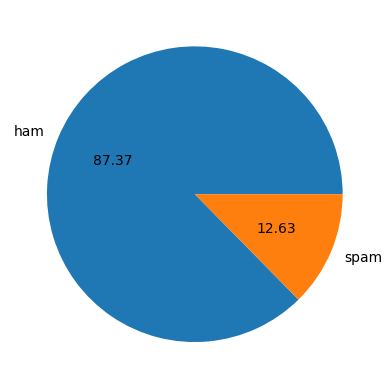

In [16]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
df['num_chars']=df['text'].apply(len)
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


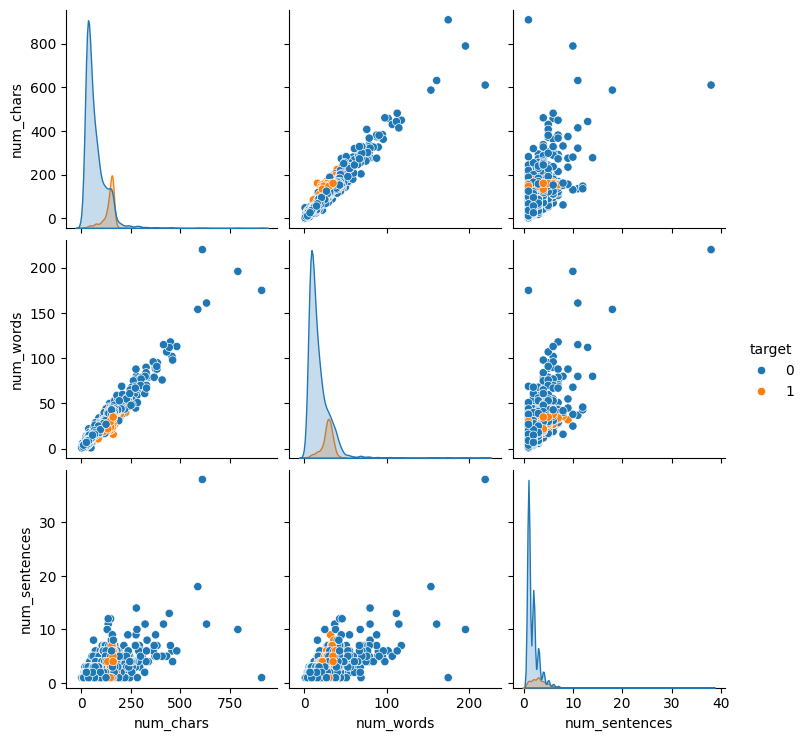

In [23]:
import seaborn as sns
sns.pairplot(df, hue='target')

<Axes: >

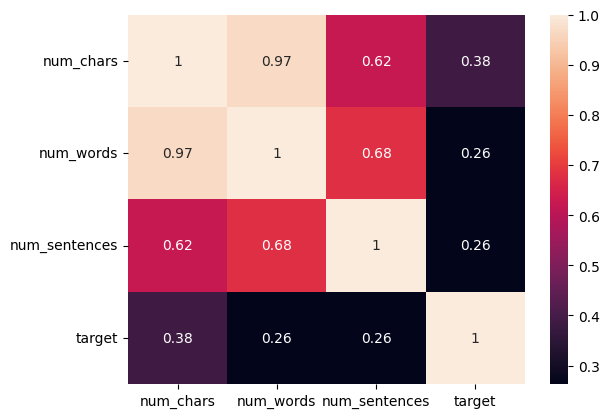

In [30]:
sns.heatmap(df[['num_chars', 'num_words', 'num_sentences','target']].corr(), annot=True)

In [132]:
def clean_text(text):
  df['text']=df['text'].str.lower()
  import re
  def remove_tags(raw_text):
    cleaned_text=re.sub(re.compile('<.*?>'),'',raw_text)
    return cleaned_text
  df['text']=df['text'].apply(remove_tags)
  import string
  def removepunc1(text):
    return text.translate(str.maketrans('','',string.punctuation))
  df['text']=df['text'].apply(removepunc1)
  from nltk.corpus import stopwords
  def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x=new_text[:]
    new_text.clear()
    return " ".join(x)
  import nltk
  nltk.download('stopwords')
  df['text']=df['text'].apply(remove_stopwords)
  from nltk.stem.porter import PorterStemmer
  ps=PorterStemmer()
  def stemming(text):
    return " ".join([ps.stem(word) for word in text.split()])
  df['text']=df['text'].apply(stemming)
  return df



In [133]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah dont think goe usf live around though,61,15,1


In [134]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc=wc.generate(df[df['target']==1]['text'].str.cat(sep=" "))

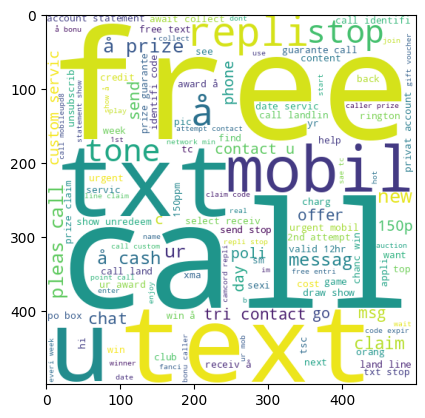

In [135]:
plt.imshow(spam_wc)

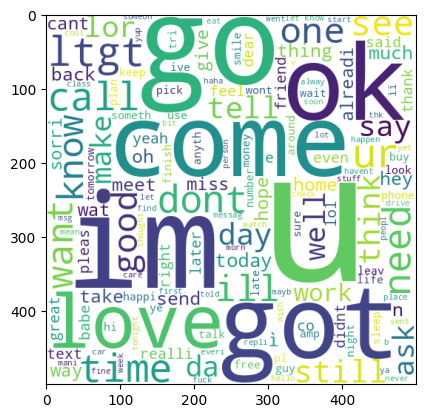

In [136]:
ham_wc=wc.generate(df[df['target']==0]['text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [57]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah dont think goe usf live around though,61,15,1


In [62]:
spam_corpus=[]
for msg in df[df['target']==1]['text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [64]:
len(spam_corpus)

10801

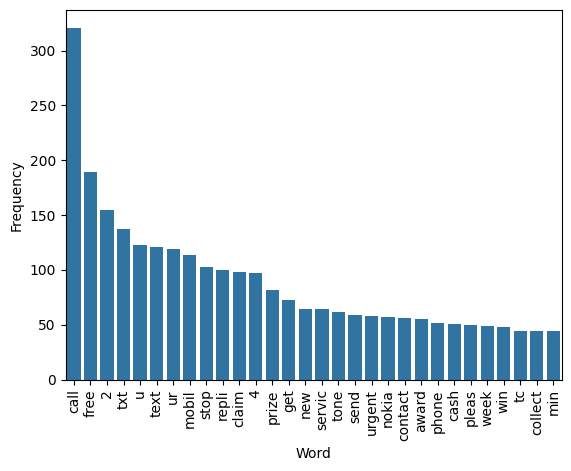

In [80]:
from collections import Counter
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=spam_corpus_df)
plt.xticks(rotation='vertical')
plt.show()

In [121]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
x=tfidf.fit_transform(df['text']).toarray()
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [124]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb.fit(x_train, y_train)
y_pred1=gnb.predict(x_test)
print("Accuracy Score for Gaussian Naive Bayes:", gnb.score(x_test, y_test))


Accuracy Score for Gaussian Naive Bayes: 0.8771760154738878


In [125]:
mnb.fit(x_train, y_train)
y_pred2=mnb.predict(x_test)
print("Accuracy Score for Multinomial Naive Bayes:", mnb.score(x_test, y_test))

Accuracy Score for Multinomial Naive Bayes: 0.9787234042553191


In [126]:
bnb.fit(x_train, y_train)
y_pred3=bnb.predict(x_test)
print("Accuracy Score for Bernoulli Naive Bayes:", bnb.score(x_test, y_test))

Accuracy Score for Bernoulli Naive Bayes: 0.9835589941972921


In [127]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred4=dtc.predict(x_test)
print("Accuracy Score for Decision Tree Classifier:", dtc.score(x_test, y_test))

Accuracy Score for Decision Tree Classifier: 0.9506769825918762


In [128]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred5=rfc.predict(x_test)
print("Accuracy Score for Random Forest Classifier:", rfc.score(x_test, y_test))

Accuracy Score for Random Forest Classifier: 0.9748549323017408


In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred6=knn.predict(x_test)
print("Accuracy Score for K Neighbors Classifier:", knn.score(x_test, y_test))

Accuracy Score for K Neighbors Classifier: 0.9081237911025145


In [130]:
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid', gamma=1.0)
svc.fit(x_train, y_train)
y_pred7=svc.predict(x_test)
print("Accuracy Score for SVC:", svc.score(x_test, y_test))

Accuracy Score for SVC: 0.9700193423597679
